# Pymaceuticals Inc.
---

### Analysis

- Perhaps the most important conclusion of the study is this: of the four drugs analyzed via box-and-whisker plots, Capomulin and Ramicane show much more promise in shrinking the tumors than Infubinol and Ceftamin.
- Unsurprisingly, the volume of the tumor shows a strong positive correlation with the weight of the mouse (for those treated with Capomulin). What makes this more interesting is that all the mice began at timepoint zero with tumors of 45 cubic mm. Therefore, the tumors also <i>grow faster or shrink more slowly</i> in larger mice.
- Note the tables of summary statistics by drug. Remembering that all mice began the study with 45 cubic mm tumors, only two drugs reduced the average size of the tumors over the course of the study: Capomulin and Ramicane. All others failed to shrink the tumors. Mice treated with the other eight drugs, on average, ended the study with larger tumors than they started with. It would be unwise to proceed with testing for those eight until they are modified.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_data = pd.merge(study_results,mouse_metadata,how='left')

# Display the data table for preview
print(study_data.count()) # checking to make sure we kept all the rows from the results
study_data.head()

Mouse ID              1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
dtype: int64


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
len(study_data['Mouse ID'].unique())

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duples = study_data[study_data.duplicated(['Mouse ID','Timepoint'],keep=False) == True]
duples

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
print(study_data['Mouse ID'][study_data['Mouse ID'] == 'g989'].count())
# will use the count below to make sure we deleted all the rows
study_data[study_data['Mouse ID'] == 'g989']

13


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = study_data[study_data['Mouse ID'] != 'g989']
print(clean_data.head())

# That should leave us with 1880 rows
clean_data.count()


  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25  


Mouse ID              1880
Timepoint             1880
Tumor Volume (mm3)    1880
Metastatic Sites      1880
Drug Regimen          1880
Sex                   1880
Age_months            1880
Weight (g)            1880
dtype: int64

In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_data['Mouse ID'].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties
# of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

drug_data = clean_data.groupby(['Drug Regimen'])
mean_data = drug_data.mean(numeric_only=True)
med_data = drug_data.median(numeric_only=True)
var_data = drug_data.var(numeric_only=True)
stdev_data = drug_data.std(numeric_only=True)
sem_data = drug_data.sem(numeric_only=True)

summary_df = pd.DataFrame({'Mean Tumor Volume':mean_data['Tumor Volume (mm3)'],\
            'Median Tumor Volume':med_data['Tumor Volume (mm3)'],\
            'Tumor Volume Variance':var_data['Tumor Volume (mm3)'],\
            'Tumor St. Dev.':stdev_data['Tumor Volume (mm3)'],\
            'Tumor Std. Err.':sem_data['Tumor Volume (mm3)']})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor St. Dev.,Tumor Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, 
# variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the
#  solution)

# Using the aggregation method, produce the same summary statistics in a single line
drug_data.agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='Measurements Recorded'>

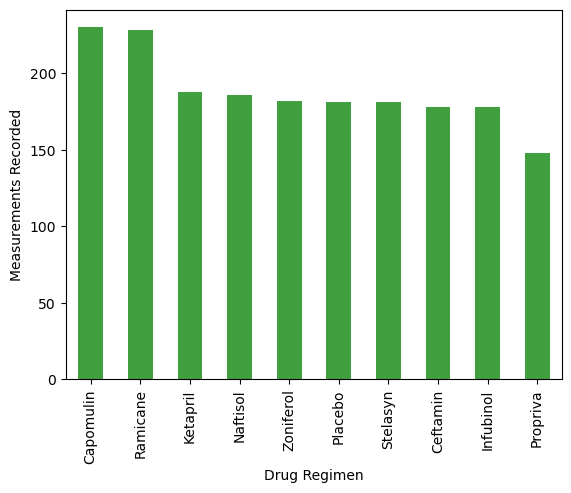

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each 
# drug regimen using Pandas.

graph_data = drug_data['Drug Regimen'].count().sort_values(ascending=False)
graph_data.plot(kind='bar',\
                xlabel='Drug Regimen',\
                ylabel='Measurements Recorded',\
                color='green',\
                alpha=0.75)


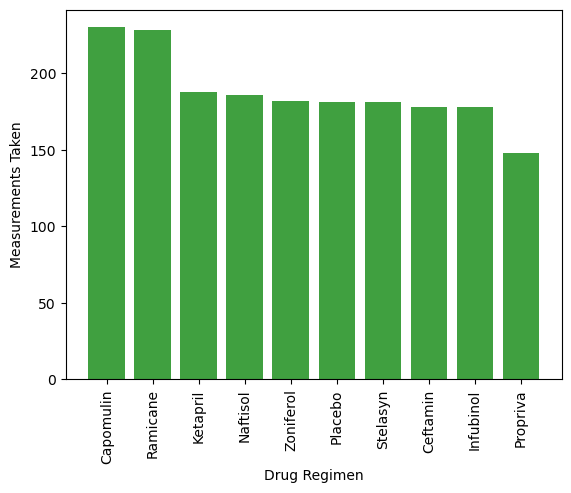

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each 
# drug regimen using pyplot.

plt.bar(range(10),graph_data.values,color='g',alpha=0.75)
plt.xticks(range(10),graph_data.index,rotation='vertical')
plt.xlabel('Drug Regimen')
plt.ylabel('Measurements Taken')

plt.show()


        count
Sex          
Male      125
Female    124


<Axes: ylabel='count'>

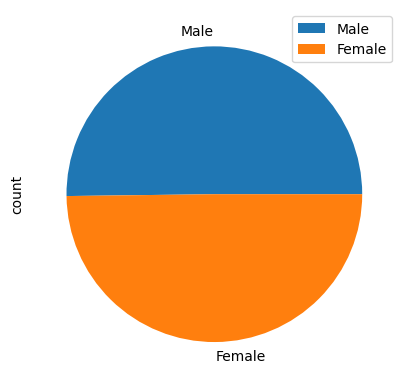

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_metadata_df = pd.DataFrame(mouse_metadata)
sex_df = pd.DataFrame(mouse_metadata_df['Sex'].value_counts())
print(sex_df)
sex_df.plot(x=sex_df.index,y='count',kind='pie')

Sex
Male      125
Female    124
Name: count, dtype: int64


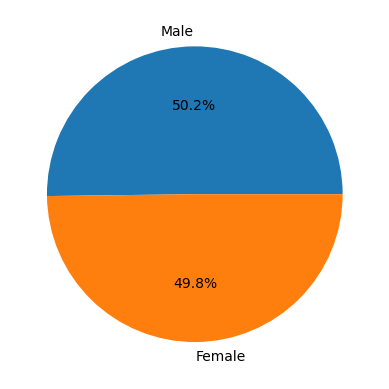

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
print(mouse_metadata_df['Sex'].value_counts()) # to check the order of the sexes in the chart
plt.pie(mouse_metadata_df['Sex'].value_counts(),labels=['Male','Female'],autopct='%1.1f%%')
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouseids = clean_data['Mouse ID'].unique()
lastpoints = []

for id in mouseids:
    lastpoints.append(clean_data[clean_data['Mouse ID'] == id]['Timepoint'].max())

lastpoints_df = pd.DataFrame({'Mouse ID':mouseids,'Timepoint':lastpoints})

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
finalvols_df = pd.merge(lastpoints_df,clean_data,how='left',on=['Mouse ID','Timepoint'])
print(finalvols_df.count())
print(finalvols_df.head())
summ_stats = finalvols_df['Tumor Volume (mm3)'].describe()
summ_stats

Mouse ID              248
Timepoint             248
Tumor Volume (mm3)    248
Metastatic Sites      248
Drug Regimen          248
Sex                   248
Age_months            248
Weight (g)            248
dtype: int64
  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128         45           38.982878                 2    Capomulin   
1     f932          0           45.000000                 0     Ketapril   
2     g107         35           71.905117                 0     Ketapril   
3     a457         10           49.783419                 0     Ketapril   
4     c819         40           62.175705                 1     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25  


count    248.000000
mean      54.968606
std       12.671479
min       22.050126
25%       45.875867
50%       55.793278
75%       65.053624
max       78.567014
Name: Tumor Volume (mm3), dtype: float64

In [16]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin','Ramicane','Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
volumes = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
volume_iqr = summ_stats['75%'] - summ_stats['25%']
    
# Locate the rows which contain mice on each drug and get the tumor volumes
for drug in drugs:
    volumes.append(finalvols_df[finalvols_df['Drug Regimen'] == drug]['Tumor Volume (mm3)'].values)
    
    # add subset 
    # I didn't understand this instruction. Everything works without it.
    
    # Determine outliers using upper and lower bounds
cap_outliers = []
ram_outliers = []
inf_outliers = []
cef_outliers = []
outliers = [cap_outliers,ram_outliers,inf_outliers,cef_outliers]
i = 0
for drug in drugs:
    for value in volumes[i]:
        if value < summ_stats['25%'] - volume_iqr\
        or value > summ_stats['75%'] + volume_iqr:
            outliers[i].append(value)
    print(f'Potential outliers for {drug}: {outliers[i]}')
    i += 1

Potential outliers for Capomulin: [23.34359787]
Potential outliers for Ramicane: [22.05012627]
Potential outliers for Infubinol: []
Potential outliers for Ceftamin: []


C:\Users\audre\AppData\Local\Temp\ipykernel_25456\2566230319.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(drugs)


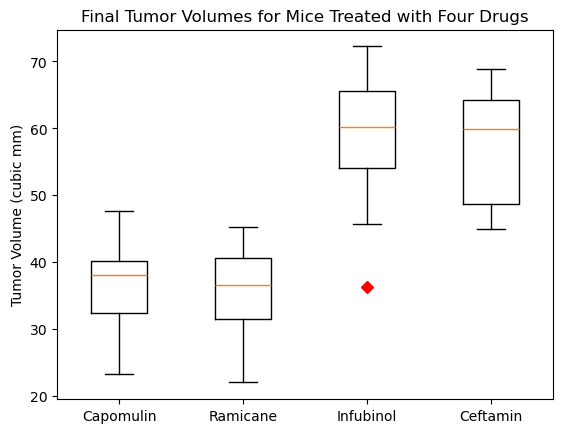

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volumes for Mice Treated with Four Drugs')
ax1.set_ylabel('Tumor Volume (cubic mm)')
ax1.set_xticklabels(drugs)
ax1.boxplot(volumes, 0, 'rD')
plt.show()

# Note that the built-in function did not identify the 23.34 mm3 tumor as an outlier.

## Line and Scatter Plots

<Axes: title={'center': 'Capomulin Treatment Results for mouse l509'}, xlabel='Timepoint (days)', ylabel='Tumor Volume (cubic mm)'>

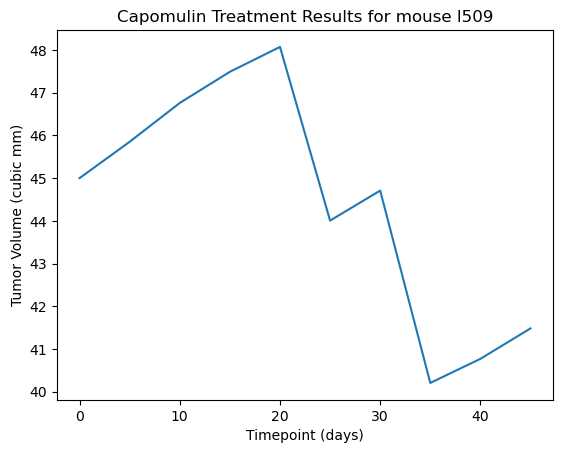

In [21]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
l509_df = clean_data[clean_data['Mouse ID'] == 'l509']
l509_df = l509_df[['Timepoint','Tumor Volume (mm3)']]
l509_df = l509_df.set_index('Timepoint')

l509_df.plot(kind='line',\
             title='Capomulin Treatment Results for mouse l509',\
                xlabel='Timepoint (days)',ylabel='Tumor Volume (cubic mm)',legend=False)

Text(0.5, 1.0, 'Tumor Volume by Mass of Mouse')

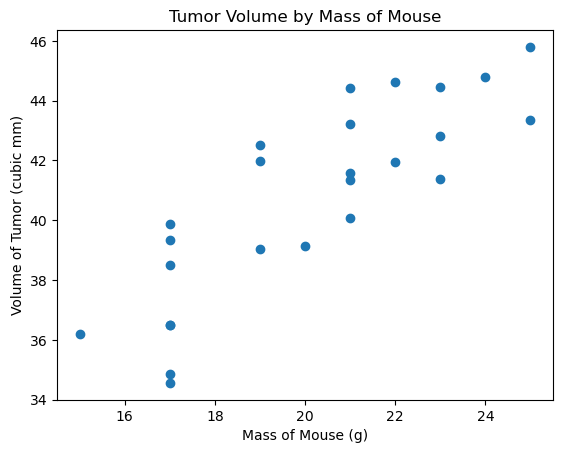

In [19]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = clean_data[clean_data['Drug Regimen'] == 'Capomulin']
weights = []
vol_avgs = []

for mouse in capomulin_df['Mouse ID'].unique():
    weights.append(capomulin_df[capomulin_df['Mouse ID'] == mouse]['Weight (g)'].mean())
    # On the above line: it looks like the weight remains fixed for each mouse throughout the data,
    # but just in case, I'll use the average of all weight measurements in the set. In a real study,
    # weight would fluctuate over the course of the trial.
    vol_avgs.append(capomulin_df[capomulin_df['Mouse ID'] == mouse]['Tumor Volume (mm3)'].mean())

plt.scatter(weights,vol_avgs)
plt.xlabel('Mass of Mouse (g)')
plt.ylabel('Volume of Tumor (cubic mm)')
plt.title('Tumor Volume by Mass of Mouse')

## Correlation and Regression

The correlation coefficient is 0.8419363424694721.


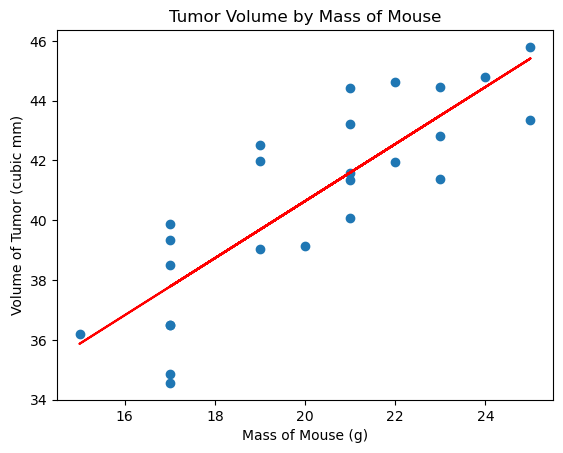

In [22]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
(slope, intercept, rvalue, pvalue, sterr) = st.linregress(weights,vol_avgs)
print(f"The correlation coefficient is {rvalue}.")

# Convert the list of weights to an array so we can enter it into the line equation:
weights_array = np.array(weights)

regress_values = weights_array * slope + intercept

plt.scatter(weights,vol_avgs)
plt.plot(weights,regress_values,'r-')
plt.xlabel('Mass of Mouse (g)')
plt.ylabel('Volume of Tumor (cubic mm)')
plt.title('Tumor Volume by Mass of Mouse')
plt.show()